# Assignment 11: Clustering Customers of a Comic Book Store

In this assignment, you will be solving a traditional problem in quantitative marketing: Customer segmentation. Having a properly segmented database is extremely important to define marketing campaigns, as it allows companies to define value-centric actions targeted towards customers of different profiles. While there are several ways we can cluster customers, in this example we will use the [Recency, Frequency and Monetary Value](https://en.wikipedia.org/wiki/RFM_(market_research)), or RFM, paradigm to do so. This way of thinking of customer data reflects the engagement between a customer and a company by reducing their interactions to three values:

- The **Recency** between interactions: The time between two subsequent purchases or between two general interactions between the customer and your organization.

- The **Frequency** of interactions: The raw number of interactions over a predefined time. This can be for example how many times a customer visits your website every month, or how many purchases the customer does at your store, etc.

- The **Monetary Value** of the interactions: The total monetary value (not necessarily positive) of the interactions of the customer with your organization over the same period of time as before.

Additionally, this dataset has a **Cost of Service** variable (which is not included in the MV calculations for this example). It shows how much cost each interaction with the customer brings. This can be useful information as a customer may make purchases of small monetary value, but may spend many hours at the store occupying the service personnel's time. This can mean on average these customers may even end up being a cost to the company! The information comes from a local comic book store, and represents the summary of interactions of the customers with a loyalty card.

In this assignment, we will create a clustering of the customers using these four variables and will create a commercial strategy arising from our results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Uncomment if working in the cloud
#!gdown https://drive.google.com/uc?id=1VL-LjrjgCtGWkDw914MVLj2sEttlL2Uv

## Task 1: Studying the data [10 pts]

Import the data and present the descriptive statistics of all variables. **Written answer: What can you say about the variables you have? Why should you normalize the data?**. Normalize the data so you can create clusters.

In [30]:
# Read the data
df=pd.read_csv("RFM_Assignment_Week11.csv")
print(df.describe())

           Recency    Frequency            MV           CoS
count  1000.000000  1000.000000   1000.000000   1000.000000
mean     30.116293    17.164128   8806.972152   8805.228492
std      17.742131    29.419952   3391.111080   3285.384316
min      -4.942628    -1.237633    760.115629    944.136187
25%      18.221827     3.710640   8065.394231   9957.361435
50%      28.588186     6.030687  10462.416975  10000.463454
75%      35.880252     9.999136  10608.634596  10041.297949
max      67.258701   102.189321  11139.504803  11054.536104


In [31]:
# Normalize (Standard) and apply to the data
normalizer=StandardScaler()
scaled_data=normalizer.fit_transform(df)


**Written answer:**

The means and standard deviations of MV and CoS are much larger than those of recency and frequency. MV and CoS are more likely to dominate the clustering process. As a result normalizing the data can solve this problem by making all variables weight the same.

## Task 2: K-Means Clustering and Silhoutte Analysis [30 pts]

Now we can perform the cluster analysis. The single most important question in cluster analysis is to determine the number of clusters that you should create. Following the labs (or [this tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)), try between 3 and 8 clusters, using a seed of 10, and plot their silouhette analyses (we will plot the clusters themselves in the next question). **Written answer: What is the optimal number of clusters using the silhouette method?**

For n_clusters = 3 The average silhouette_score is : 0.7441085737382345
For n_clusters = 4 The average silhouette_score is : 0.7899120450839303
For n_clusters = 5 The average silhouette_score is : 0.7249329012890494
For n_clusters = 6 The average silhouette_score is : 0.6556732220239838
For n_clusters = 7 The average silhouette_score is : 0.6513064350384187
For n_clusters = 8 The average silhouette_score is : 0.6142740011419974


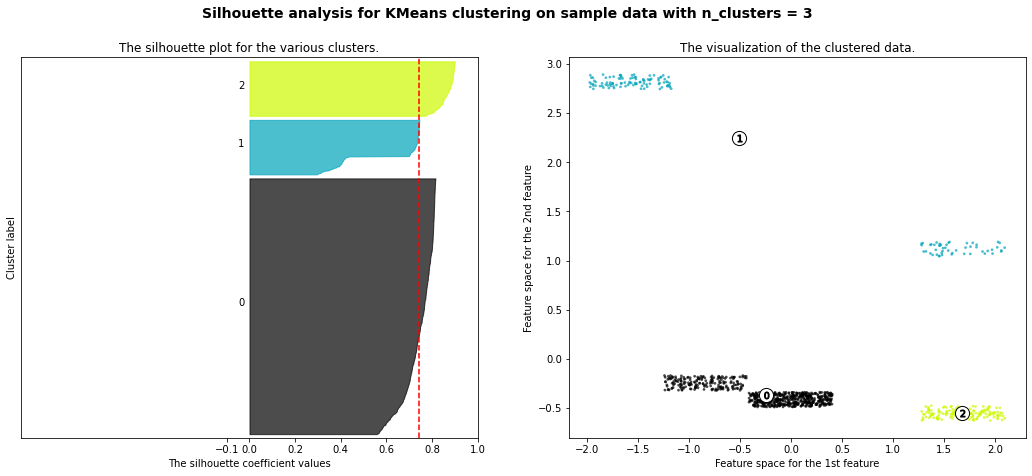

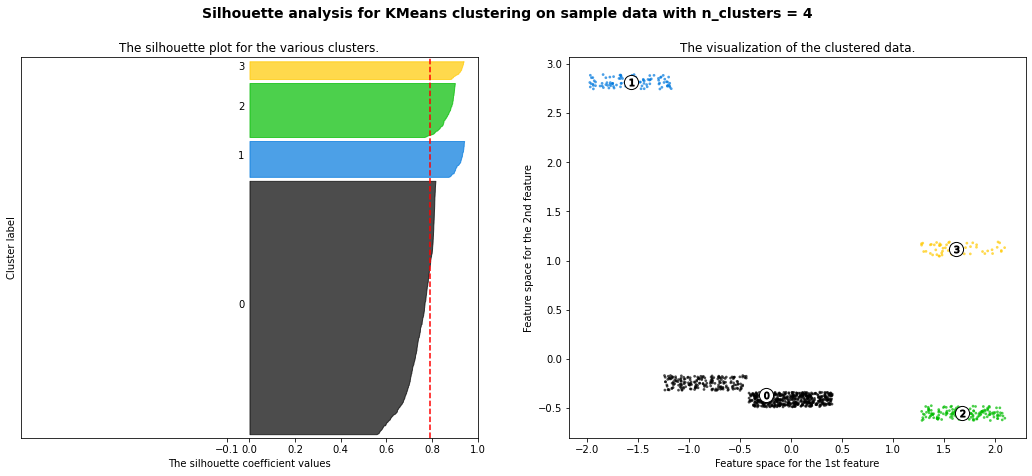

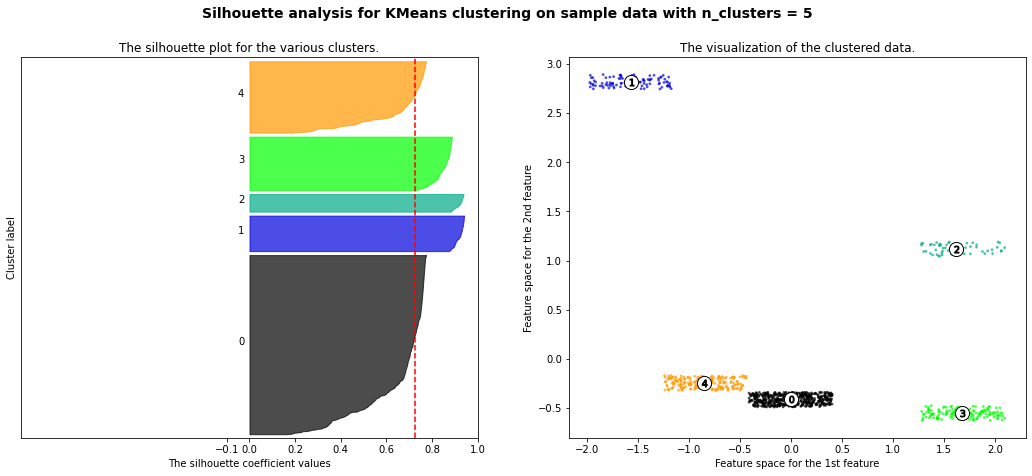

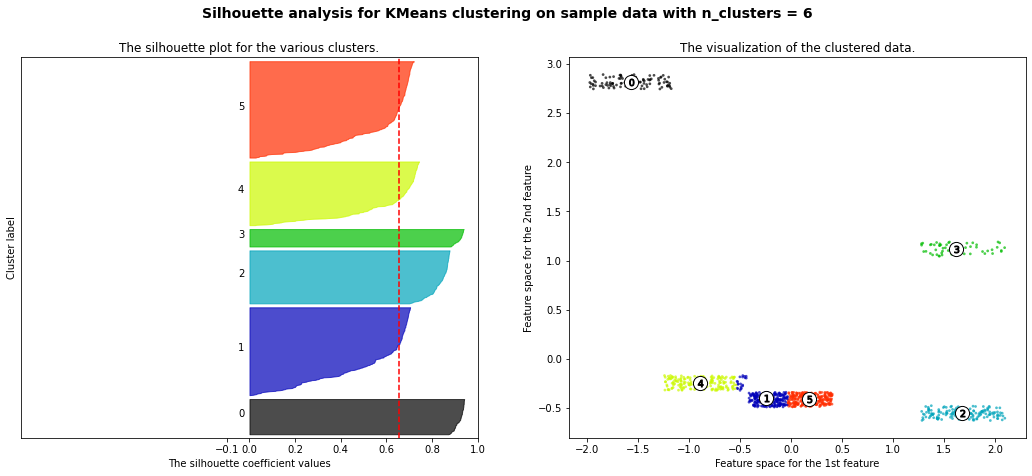

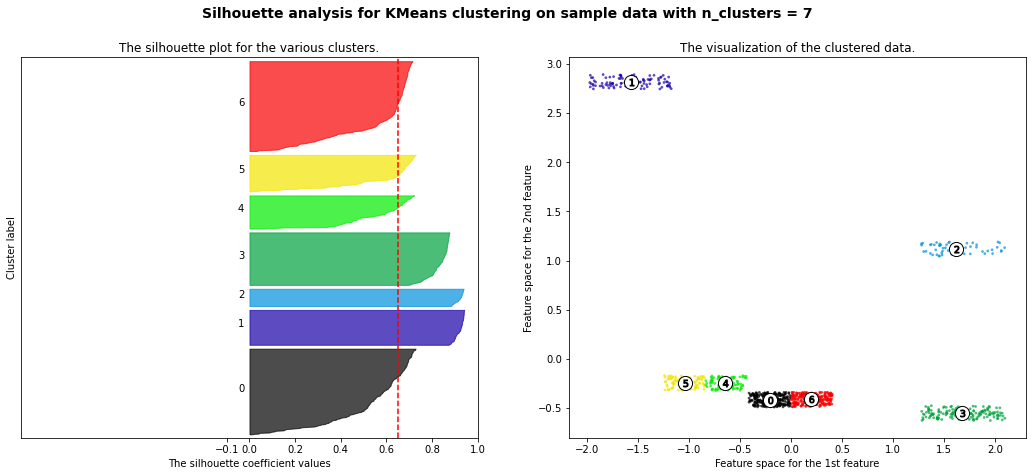

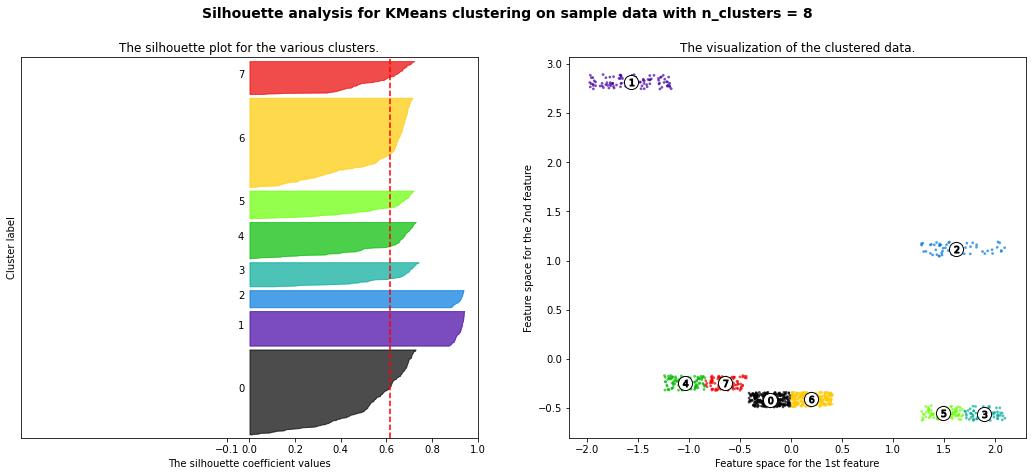

In [38]:
# Your answer here.

range_n_clusters = [3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_data[:, 0], scaled_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Written answer:**

optimal number of cluster is 4.

## Task 3: Plotting the clusters [20 pts]

Now we will visualize what we just did. For this we will use a common trick in clustering: use a PCA transform to reduce the data to a few variables (two or three) and plot those. Apply a PCA transform to the data using two components and create a scatterplot, differentiating by using colours the clusters from previous answer using a different colour. **Note the clusters still must be calculated over the unrotated data**. Use only your results from using 3, 4 and 5 clusters. **Written answer: How many clusters would you use considering the results of task 2 and these ones?**

For n_clusters = 3 The average silhouette_score is : 0.7441085737382345
For n_clusters = 4 The average silhouette_score is : 0.7899120450839303
For n_clusters = 5 The average silhouette_score is : 0.7249329012890494


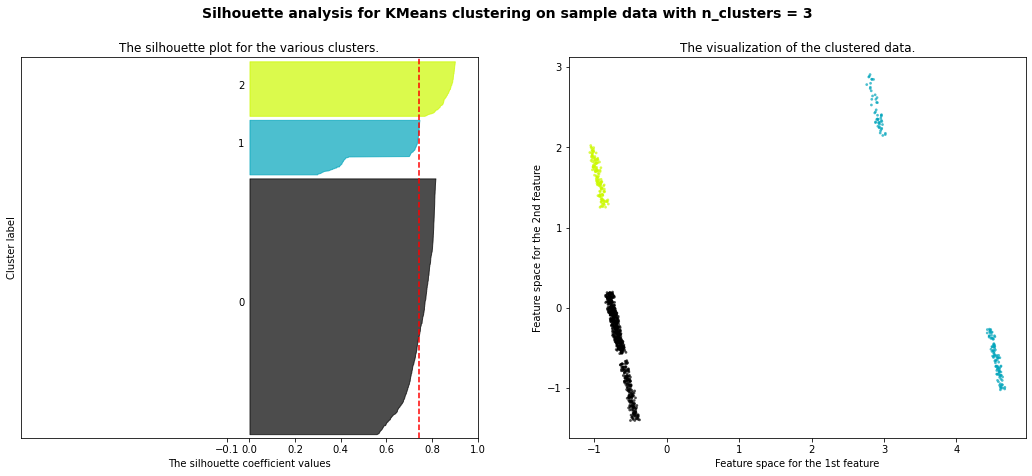

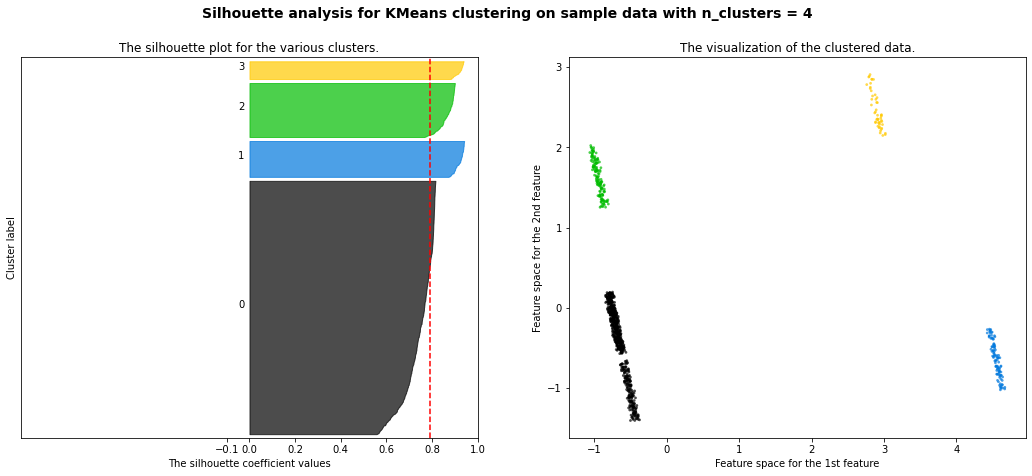

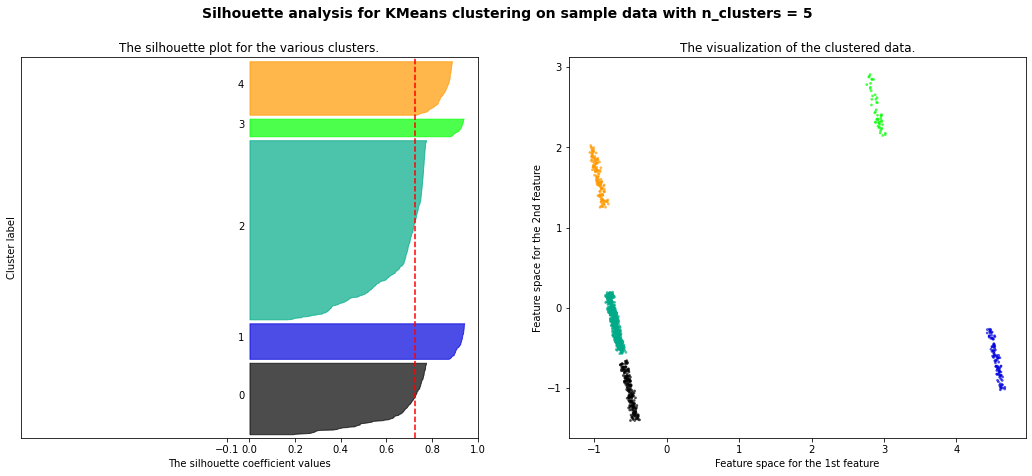

In [43]:
# Your code here. Add as many cells as you need!
PCA_model=PCA(n_components=2)
PCA_model.fit_transform(scaled_data)
transformed_data=PCA_model.transform(scaled_data)

range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(transformed_data[:, 0], transformed_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')




    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Written answer**

I would use 5 clusters. From the scatter plot, we can tell that data can be separated into 5 distinct clusters. Furthermore, the silhouette score for 5 clusters is not bad. 

## Task 4: Deploying the model. [20 pts]

The objective of any cluster analysis over customer data is to create a reasonable segmentation of your customers. Using the number of clusters you have decided in Task 3 and a table of the averages per variable for each cluster, name the different clusters and think what would a company would do with a customer in that cluster. (*Hint: For example a clusters with high frequency, low recency, and low monetary value are desirable customers for whom it would be a good plan to try to increase their monetary value while keeping their high engagement. You could name them "Diamonds in the rough". [Pandas' `groupby`](https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average) can probably help.*)

In [48]:
# Your code here.
clusterer = KMeans(n_clusters=5, random_state=10)
cluster_labels = clusterer.fit_predict(scaled_data)
df["cluster"]=cluster_labels
print( df.groupby(['cluster']).mean())

           Recency  Frequency            MV           CoS
cluster                                                  
0        30.017272   5.059000  10494.803018  10000.188643
1         2.167553  99.947029   1153.133946   1005.710736
2        58.743535  50.159107    876.930495   1090.134542
3        59.809092   0.868768   8007.350500  11001.099604
4        14.911803  10.008273  10996.540746   9999.457148


**Written answer: (note this answer will be much longer than usual as you need to make an argument for every cluster)**

The first cluster (cluster 0) has low frequency, high monetary value, and high cost of service. I would name this cluster "not frequent big buyer " for whom it would be a good plan to try to increase their frequency and recency while decreasing their cost of services. The second cluster (cluster 1) has very low recency and very high frequency. However, the monetary value is low. The cost of service is also low. I would name this cluster "regular customer" for whom it would be a good plan to try to increase their momentary value while keeping their high engagement. The third cluster (cluster 2) has high recency, high frequency, low momentary value and low cost of service. I would name this cluster "highly frequent but not regular customer", for whom it would be a good plan to try to increase their recency and momentary values. The fourth cluster (cluster 3) has high recency, very low frequency, high momentary value, and high cost of service. I would name this cluster "nondesirable customer". for whom it would be a good plan to try to increase their engagement and decrease the cost of service. The fifth cluster (cluster 4) is "more frequent big buyer". This cluter has low recency, low frequency, high momentary value, and high cost of service. It is similar to first cluster, but its frequency is higher than first cluster. For whom it would be a good plan to increase recency and frequency while keeping their high momentary value. 

## Task 5: Hierarchical clustering comparison [20 pts]

Now repeat the clustering process using a complete linkage hierarchical clustering with cosine affinity, using the same number of clusters as Task 4. Using the PCA transform you calculated in Task 3, create a scatterplot differentiating the obtained clusters using different colours. **Written answer: What can you say about the new clustering you obtained? Why does this happen? When would you say it is a good idea to use this configuration?** 

Text(0, 0.5, 'Feature space for the 2nd feature')

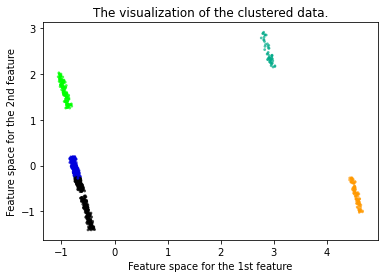

In [50]:
# Your code here
clusterer=AgglomerativeClustering(n_clusters=5,         # Number of clusters
                                  affinity='cosine', # Type of distance. Depends on your data and you can create your own!
                                  linkage="complete"      # Type of linkage. Options 
                                    )
cluster_labels = clusterer.fit_predict(scaled_data)

fig, ax1 = plt.subplots(1, 1)
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax1.scatter(transformed_data[:, 0], transformed_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


ax1.set_title("The visualization of the clustered data.")
ax1.set_xlabel("Feature space for the 1st feature")
ax1.set_ylabel("Feature space for the 2nd feature")


**Written answer:**

New clustering obtained is not that good because the data are not separated into 5 distinct clusters as K-means clustering. This happens because complete linkage favors compact clusters. However, in this case, the data form filamentous clusters. Then the clustering is not optimal. We should use this configuration when the data form compact clusters of approximately equal diameters. 